<a href="https://colab.research.google.com/github/SagarChhabriya/Sem-6/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


- **1. Introduction to Regression**  
  - **1.1 Regression Theory**  
  - **1.2 How Regression Works?**  

- **2. Key Components of Regression**  
  - **2.1 Regression - Features and Labels**  
  - **2.2 Regression Training and Testing**  

- **3. Linear Regression**  
  - **3.1 The Best Fit Slope**  
  - **3.2 The Best Fit Line**  
  - **3.3 Linear Regression - Cost Function**  
  - **3.4 Linear Regression – Gradient Descent**  

- **4. Applications of Regression**  
  - **4.1 Regression - Forecasting and Prediction**  


### Import Libraries

In [ ]:
import pandas as pd


### Read dataset from github


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/SagarChhabriya/DSc/refs/heads/main/datasets/01-Simple-Linear-Reg/cgpa.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


### Create a scatter plot and interpret

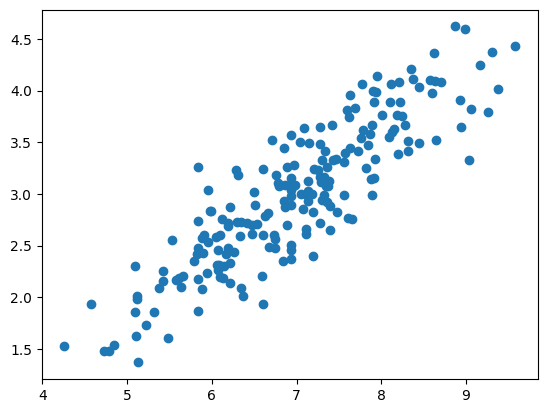

In [ ]:
# Create using matplotlib
import matplotlib.pyplot as plt

X = df['cgpa']
y = df['package']
plt.scatter(X,y)

<Axes: xlabel='cgpa', ylabel='package'>

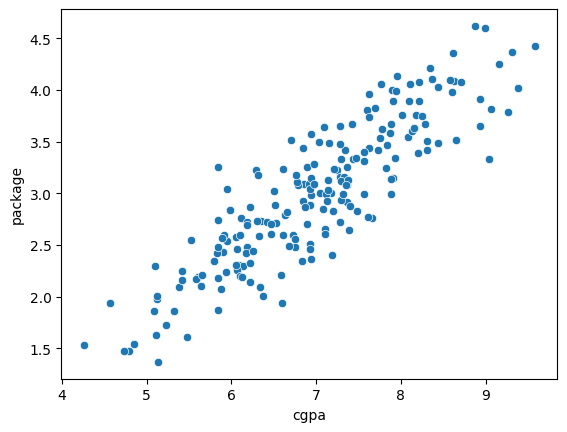

In [ ]:
# scatterplot using seaborn
import seaborn as sns

sns.scatterplot(data=df, x=X,y=y)


But what does this plot say?
I don't understand... <img src="https://emojicdn.elk.sh/🤷‍♂️" width="50px">



Let's read something called regression... 😤



# Introduction to Regression

## What is Regression?  
Regression is a statistical method to model the relationship between a dependent variable and one or more independent variables.  

## Why is it Useful?  
Helps predict outcomes, and understand relationships. <br><br>

## Real-World Example: Predicting a student’s package based on cgpa.


It means there is a relationship in cgpa and package 🤔

relationship between a **dependent (Y)** variable and one or more **independent(X)** variables.  🧐


  # Regression Theory

## Basic Concepts  
- **Dependent Variable (Y):** The outcome we want to predict (e.g., cgpa).  
- **Independent Variable (X):** The input used to predict the outcome (e.g., package).  
- **Relationship:** Regression finds the best mathematical relationship between X and Y.  

## Types of Regression  
- **Linear Regression:** Predicts a continuous outcome using a straight-line relationship.  
- **Multiple Regression:** Uses multiple independent variables.  
- **Polynomial Regression:** Models non-linear relationships.  
- **Logistic Regression:** Predicts binary outcomes (e.g., yes/no).  



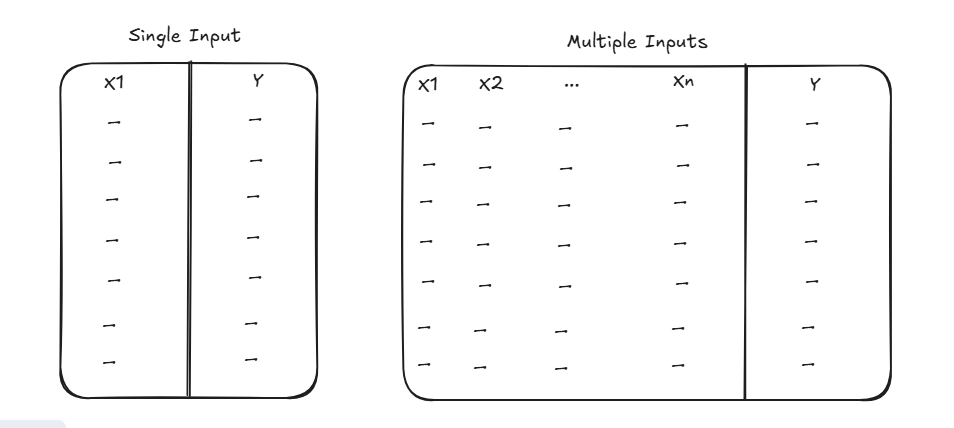

## Analogy  
Think of regression as fitting the best "trendline" through data points on a scatter plot.  


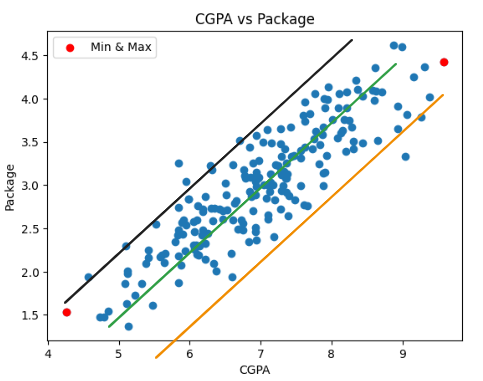

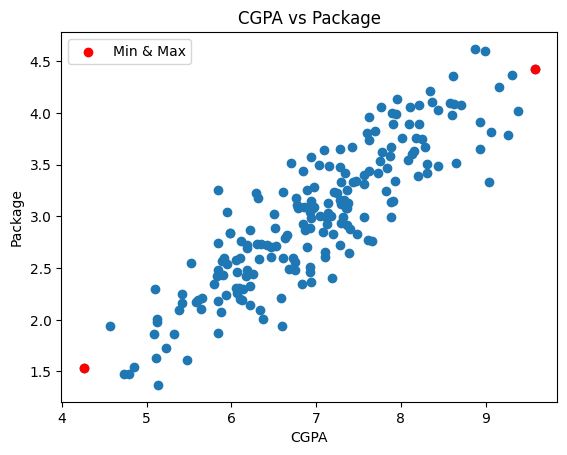

In [ ]:
import numpy as np

# Find the min and max CGPA values and their corresponding package values
min_cgpa = df['cgpa'].min()
max_cgpa = df['cgpa'].max()

min_package = df[df['cgpa'] == min_cgpa]['package'].values[0]
max_package = df[df['cgpa'] == max_cgpa]['package'].values[0]

# Scatter plot for min and max points

plt.scatter(X,y)

plt.scatter([min_cgpa, max_cgpa], [min_package, max_package], color='red', label='Min & Max')

# Labels and title
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('CGPA vs Package')
plt.legend()


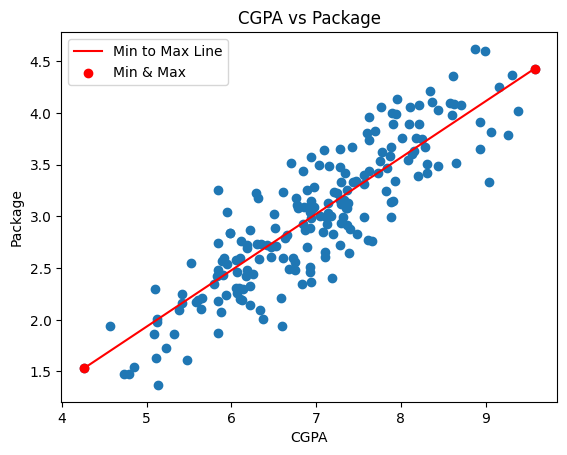

In [ ]:
# Scatter plot for min and max points

plt.scatter(X,y)
# Draw a line from (min_cgpa, min_package) to (max_cgpa, max_package)
plt.plot([min_cgpa, max_cgpa], [min_package, max_package], color='red', linestyle='-', label='Min to Max Line')
plt.scatter([min_cgpa, max_cgpa], [min_package, max_package], color='red', label='Min & Max')
# Labels and title
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('CGPA vs Package')
plt.legend()


# 3. How Regression Works  

## Mathematical Intuition  
Regression finds the line (or curve) that minimizes the difference between predicted and actual values.  

### Equation for Linear Regression  
$$
Y = mX + b
$$  
Where:  
- **Y** = Dependent variable  
- **X** = Independent variable  
- **m** = Slope of the line  
- **b** = Y-intercept  



# 4. Features and Labels in Regression  

## Features (Independent Variables)  
**Definition:** Input variables used to make predictions

## Labels (Dependent Variable)  
**Definition:** The output we want to predict   



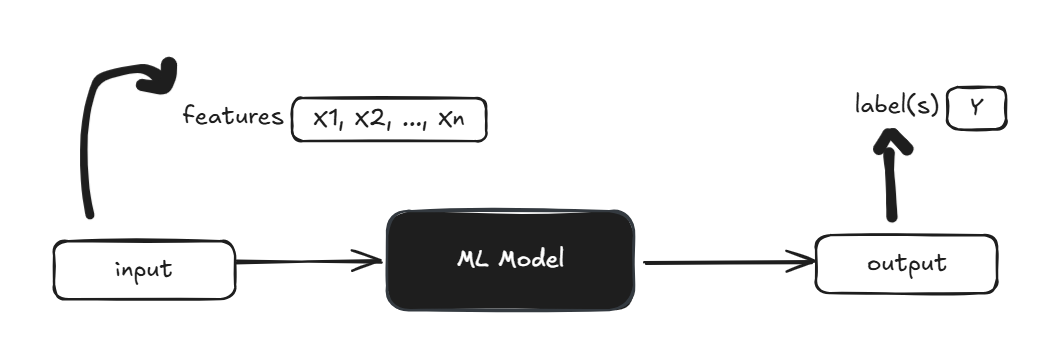

# 5. Training and Testing in Regression  

## Training Data  
Used to teach the model the relationship between features and labels.  

## Testing Data  
Used to evaluate how well the model generalizes to new, unseen data.  



---


Think of training as studying for an exam and testing as taking the actual exam.  



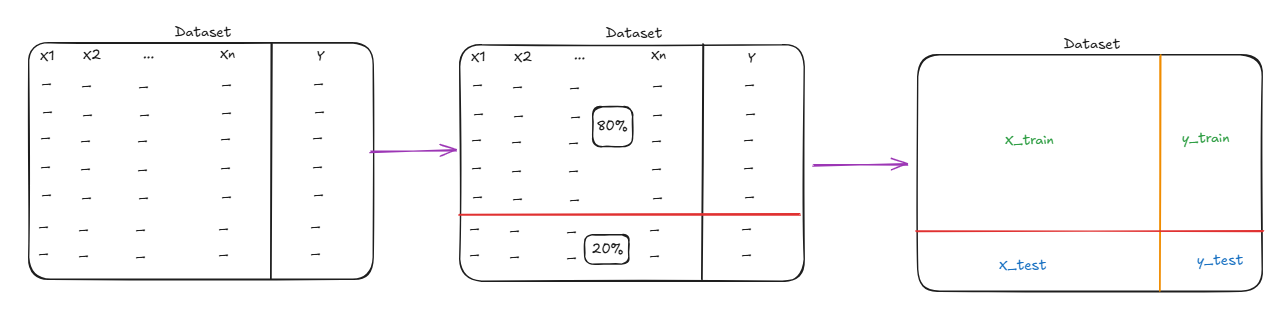

In [37]:
# split 80/20
from sklearn.model_selection import train_test_split

X = df['cgpa']
y = df['package']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train

,cgpa
79,7.18
197,7.21
38,8.62
24,6.53
122,5.12
...,...
106,6.13
14,7.73
92,7.90
179,7.14


# 6. Linear Regression  

## Definition  
A linear approach to modeling the relationship between a dependent variable and one or more independent variables.  

## Formula  
$$
Y = mX + b
$$  
Where:  
- **m** = Slope (how much Y changes for a unit change in X).  
- **b** = Y-intercept (value of Y when X is 0).  


In [43]:
X_train.shape, y_train.shape

((160,), (160,))

In [44]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [45]:
# fit the model
from sklearn.linear_model import LinearRegression



model = LinearRegression()

model.fit(X_train, y_train)




LinearRegression()

# 7. Regression Prediction  



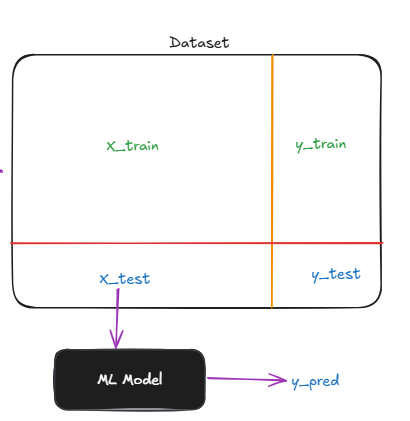

In [47]:
# predictions

X_test = X_test.values.reshape(-1,1)

y_pred = model.predict(X_test)




In [54]:

new_cgpa = [[8]]
predicted_score = model.predict(new_cgpa)

predicted_score

array([[3.56704484]])

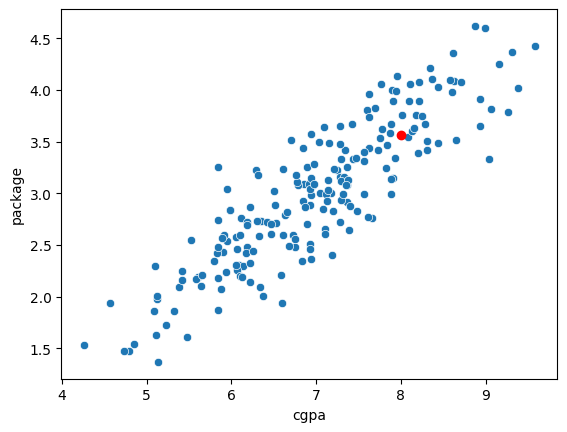

In [57]:
sns.scatterplot(data=df, x=X, y=y)
plt.scatter(8,predicted_score, color='red')


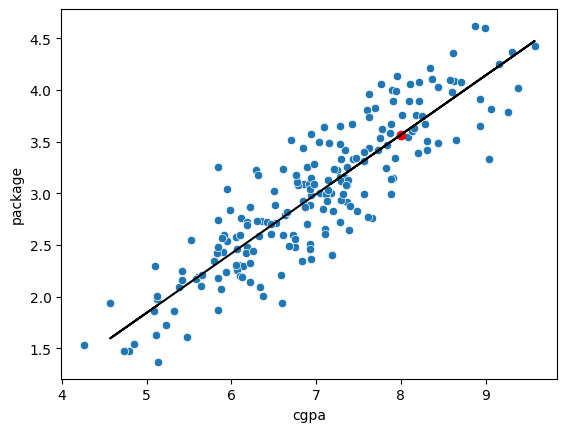

In [61]:
sns.scatterplot(data=df, x=X, y=y)
plt.scatter(8,predicted_score, color='red')
plt.plot(X_train, model.predict(X_train), color='black', label='Best Fit Line')

# 8. The Best Fit Slope  

## What is it?  
The slope (**m**) that minimizes the error between predicted and actual values.  

## Why It’s Important  
Determines the strength and direction of the relationship between **X** and **Y**.  

## Visual  
Show multiple lines with different slopes and highlight the one with the least error.  


In [63]:
m = model.coef_
b = model.intercept_
x = 8 # new input
y = m * x + b

y

array([[3.56704484]])

# 9. The Best Fit Line  

## Concept  
The line that minimizes the sum of squared errors (differences between predicted and actual values).  

## Minimizing Error  
The goal is to make predictions as close as possible to the actual data points.  

## Analogy  
Think of the best-fit line as the "average" path through the data points.  

## Interactive Element  
Use a tool (e.g., Excel or Python) to let the audience adjust the slope and intercept to find the best-fit line.  


# 10. Cost Function in Linear Regression  

## Mean Squared Error (MSE)  
Measures the average squared difference between predicted and actual values.  

### Formula  
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$  
Where:  
- **Yᵢ** = Actual value  
- **Ŷᵢ** = Predicted value  
- **n** = Number of data points  

## Why Optimize?  
Minimizing MSE ensures the model makes accurate predictions.  

## Visual  
Show a graph of MSE vs. slope to illustrate the optimization process.  


In [65]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred=y_pred))
print(r2_score(y_test, y_pred=y_pred))

0.08417638361329656
0.7730984312051673


# 11. Gradient Descent in Linear Regression  

## What is it?  
An optimization algorithm used to minimize the cost function (MSE).  

## How it Works  
1. Start with random values for slope (**m**) and intercept (**b**).  
2. Calculate the gradient (direction of steepest ascent) of the cost function.  
3. Update **m** and **b** to move in the direction that reduces the cost.  
4. Repeat until the cost is minimized.  

## Step-by-Step Example  
Walk through a simple iteration of gradient descent.  

## Analogy  
Think of gradient descent as hiking down a hill to find the lowest point (minimum error).  

## Interactive Element  
Use an animation to show how gradient descent converges to the best-fit line.  
